## Problem Statement:- 
#### Prepare a classification model using SVM for salary data 
#### Data Description:
#### age -- age of a person
#### workclass	-- A work class is a grouping of work 
#### education	-- Education of an individuals	
#### maritalstatus -- Marital status of an individulas	
#### occupation	 -- occupation of an individuals
#### relationship -- 	
#### race --  Race of an Individual
#### sex --  Gender of an Individual
#### capitalgain --  profit received from the sale of an investment	
#### capitalloss	-- A decrease in the value of a capital asset
#### hoursperweek -- number of hours work per week	
#### native -- Native of an individual
#### Salary -- salary of an individual

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
test = pd.read_csv(r'C:\DS Assignments\Assignment 17(Support Vector Machines)\SalaryData_Test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
train = pd.read_csv(r'C:\DS Assignments\Assignment 17(Support Vector Machines)\SalaryData_Train.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


## One Hot Encoding

In [6]:
train1 = train.iloc[:,0:13]
train1 = pd.get_dummies(train1)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
test1 = test.iloc[:,0:13]
test1 = pd.get_dummies(test1)
test1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## PCA to decide best features

In [8]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
train_scaler = pd.DataFrame(trans.fit_transform(train1))
test_scaler = pd.DataFrame(trans.fit_transform(test1))

In [9]:
pca_train = PCA(n_components = 102)
pca_train_values = pca_train.fit_transform(train_scaler)
var = pca_train.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([19.42, 27.36, 34.3 , 40.13, 45.  , 49.69, 53.89, 57.2 , 60.27,
       62.99, 65.66, 68.19, 70.45, 72.53, 74.44, 76.26, 77.9 , 79.45,
       80.74, 81.95, 83.09, 84.15, 85.19, 86.17, 87.08, 87.91, 88.71,
       89.49, 90.23, 90.97, 91.68, 92.38, 93.04, 93.64, 94.12, 94.56,
       94.97, 95.37, 95.73, 96.06, 96.37, 96.67, 96.96, 97.24, 97.49,
       97.69, 97.88, 98.06, 98.19, 98.31, 98.42, 98.53, 98.62, 98.7 ,
       98.78, 98.85, 98.92, 98.99, 99.06, 99.12, 99.17, 99.22, 99.27,
       99.32, 99.37, 99.41, 99.45, 99.49, 99.53, 99.57, 99.6 , 99.63,
       99.66, 99.68, 99.7 , 99.72, 99.74, 99.76, 99.78, 99.8 , 99.82,
       99.83, 99.84, 99.85, 99.86, 99.87, 99.88, 99.89, 99.9 , 99.91,
       99.92, 99.93, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94])

In [10]:
pca_test = PCA(n_components = 102)
pca_test_values = pca_test.fit_transform(test_scaler)

In [11]:
## Best columns
finaltrain = pd.concat([pd.DataFrame(pca_train_values[:,0:50]),
                     train[['Salary']]], axis = 1)
finaltrain

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Salary
0,0.511884,-0.570399,0.985410,0.869147,0.301768,-0.160966,-0.069890,-0.248351,0.292375,-0.204779,...,0.030888,-0.009637,0.023509,0.032497,-0.008378,-0.012893,0.010010,0.008061,0.004295,<=50K
1,-1.186474,0.389451,0.805358,0.407706,0.380658,-0.302254,-0.106618,0.209061,0.920905,-0.145158,...,0.040729,0.169355,0.027562,-0.279358,-0.006266,-0.023825,0.011086,0.001754,0.004931,<=50K
2,0.327319,-0.448965,-0.614483,1.019098,-0.704198,0.351374,0.014607,0.297586,0.005990,0.073360,...,-0.013262,0.007118,-0.008797,-0.031967,-0.002822,-0.007099,0.012725,0.000795,0.000232,<=50K
3,-0.872767,-0.017105,-0.213117,-0.454347,0.086417,0.047109,1.242660,-0.134197,-0.038709,0.072120,...,0.029573,-0.027681,-0.032428,0.074622,-0.052941,-0.003730,0.007214,-0.023176,-0.005332,<=50K
4,0.371012,1.147050,0.312747,-0.460719,0.180534,-1.024316,1.292872,-0.349665,-0.469696,0.025009,...,-0.006947,0.049808,0.164154,0.033541,0.052217,-0.042265,-0.048384,-0.018132,-0.028936,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.294538,0.952058,-0.098474,-0.531724,-0.213346,-0.469396,-0.279332,-0.316085,-0.179942,-0.061729,...,0.001081,-0.018555,-0.004878,0.006175,-0.006878,-0.026817,0.003204,-0.003681,-0.009443,<=50K
30157,-1.001348,-0.091425,-0.831089,0.003952,-0.135485,-0.197470,-0.096730,-0.126849,-0.024601,0.013202,...,0.012399,0.025686,-0.005910,-0.031552,-0.004978,-0.018105,-0.004142,0.001880,-0.000162,>50K
30158,0.942438,0.867860,-0.980524,-0.022298,-0.026156,-0.069330,-0.277006,0.235377,0.019852,-0.204333,...,-0.113669,-0.046058,-0.011529,0.061477,0.003091,-0.012718,0.010911,-0.018206,-0.002553,<=50K
30159,0.532346,-1.046443,-0.611753,-0.193523,0.522283,-0.205924,-0.417356,0.253337,0.130520,-0.308680,...,0.015750,0.050755,0.010786,-0.125936,0.020046,-0.009400,0.004629,0.009742,0.004545,<=50K


In [12]:
finaltest = pd.concat([pd.DataFrame(pca_test_values[:,0:50]),
                     test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Salary
0,0.544139,-1.082697,0.043718,-0.638660,0.600414,-0.037211,1.117301,0.303058,0.089471,-0.027091,...,-0.039742,-0.026572,0.067608,-0.043980,-0.048214,-0.031360,-0.005013,-0.000361,-0.008008,<=50K
1,-1.017577,-0.173468,-0.721000,0.034038,-0.051207,-0.169266,-0.173861,-0.133687,-0.010559,0.008086,...,-0.028487,0.020086,-0.024653,0.019499,-0.001208,0.038778,0.010639,-0.016478,-0.012826,<=50K
2,-1.079069,0.331812,0.385397,0.156170,0.541402,0.179608,-0.124271,-0.014775,-0.098975,-0.068643,...,-0.010730,-0.047369,-0.047461,0.084653,0.013472,0.011303,0.007996,-0.008328,0.003764,>50K
3,-0.846450,-0.012312,-0.003005,-0.778263,-0.161833,0.679751,1.182308,-0.408033,0.064636,0.140687,...,0.007125,-0.013947,-0.018003,0.047481,-0.018848,-0.019185,-0.000007,-0.003100,0.063413,>50K
4,0.613603,-0.980319,0.315324,0.309863,-0.254993,0.026711,0.039416,-0.213736,-0.160857,-0.153713,...,0.001472,0.000903,-0.034617,0.029876,0.001334,-0.026582,0.018164,0.016502,0.001699,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.392559,-0.799233,0.857450,-0.224953,0.264490,-0.949432,0.035834,0.698898,-0.383183,-0.172809,...,-0.006333,-0.000722,0.014517,-0.059677,-0.059991,-0.009347,0.002798,-0.000091,-0.015655,<=50K
15056,1.064367,0.803553,0.497037,0.719569,-0.820526,-0.579177,0.120411,0.287500,-0.512440,0.030903,...,0.017556,-0.012311,-0.049600,0.014514,-0.006896,0.001337,-0.004356,-0.017986,-0.006914,<=50K
15057,-1.022440,0.211868,0.552672,-0.053465,-0.327323,-0.844022,0.221308,0.212895,-0.480768,-0.051884,...,-0.003702,-0.002894,0.011435,-0.056956,-0.061227,-0.004168,0.002539,0.004180,-0.015829,<=50K
15058,0.346779,-0.164803,0.224122,-0.087735,-0.083448,-0.185222,0.845949,0.963429,0.287051,0.031549,...,0.051194,-0.243051,0.133580,0.050948,-0.039688,-0.082235,0.025593,0.039421,-0.031407,<=50K


In [13]:
# will use some part of data as commands are taking really long time to execute with such big data set
array = finaltrain.values
X = array[0:2000:,0:50]
Y = array[0:2000:,50]

## KNN model

In [14]:
# Grid search CV to find best value for K

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [16]:
print(grid.best_score_)
print(grid.best_params_)

0.828
{'n_neighbors': 29}


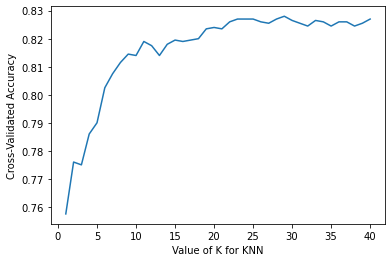

In [17]:
# Visualizing the CV results

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [18]:
#KNN Classification

num_folds = 10
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=29)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8239999999999998


## SVM Classification

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [20]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X,Y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [21]:
gsv.best_params_ , gsv.best_score_

({'C': 11, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7875)

In [22]:
# using some part of test data
array1 = finaltest.values
x = array1[0:2000:,0:50]
y = array1[0:2000:,50]

In [23]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x , y)
y_pred = clf.predict(x)
acc = accuracy_score(y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y, y_pred)

Accuracy = 98.45


array([[1500,    6],
       [  25,  469]], dtype=int64)

#### SVM gives higher accuracy i.e 98.45 than of KNN